<a href="https://colab.research.google.com/github/nmarizani/intro_to_ml_summative/blob/main/Summative_Intro_to_ml_%5Bnicolle_marizani%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfroAI-VaxDemand: Predicting Regional Vaccine Demand Using Machine Learning

> ***Brief Description:***
Accurate prediction of regional vaccine demand is essential for guiding local vaccine manufacturing and distribution in Africa. This project develops a machine learning model to classify vaccine demand levels (Low, Medium, High) using regional uptake and organizational data. The goal is to enable data-driven planning that supports efficient local production and supply chain management.


# Case Study and Implementation




In [51]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Neural network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2



# The Dataset

***Dataset Description***
The dataset, cleaned_vaccine_data.csv, contains records related to vaccine uptake across various regions and organizations. Each row represents a data point for a specific region-organization instance and includes:

Region: The geographical area where the vaccine program was implemented.

Org_Name: The name of the organization managing or supporting the vaccination effort.

Uptake_Percent: The percentage of vaccines that were utilized or administered in that region.

demand_level (derived): A categorical variable derived from Uptake_Percent to indicate whether demand was:**Low, Medium, High**

The demand_level is the target variable to be predicted.

In [52]:
# Loading Data
df = pd.read_csv('cleaned_vaccine_data.csv', encoding='ISO-8859-1', skiprows=16)
df.head()


,Table 5: Influenza vaccination by staff group,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Region code,Region,Org code,Trust name,All frontline HCWs:\ninvolved with direct pati...,All frontline HCWs:\nvaccinated (n),All frontline HCWs:\npercentage vaccine uptake,All doctors:\ninvolved with direct patient car...,All doctors:\nvaccinated (n),All doctors:\npercentage vaccine uptake,Qualified nurses (including GP practice nurse...,Qualified nurses (including GP practice nurse...,Qualified nurses (including GP practice nurse...,All other professionally qualified clinical st...,All other professionally qualified clinical st...,All other professionally qualified clinical st...,All support staff:\ninvolved with direct patie...,All support staff:\nvaccinated (n),All support staff:\npercentage vaccine uptake
1,Y61,East of England Commissioning Region,RC9,Bedfordshire Hospitals NHS Foundation Trust,"7,911","4,077",51.5,"1,506",856,56.8,"2,839","1,585",55.8,"1,025",564,55.0,"2,541","1,072",42.2
2,Y61,East of England Commissioning Region,RGT,Cambridge University Hospitals NHS Foundation ...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,Y61,East of England Commissioning Region,RT1,Cambridgeshire And Peterborough NHS Foundation...,"4,529","1,302",28.7,209,65,31.1,"1,210",370,30.6,"1,021",347,34.0,"2,089",520,24.9
4,Y61,East of England Commissioning Region,RYV,Cambridgeshire Community Services NHS Trust,"2,000","1,109",55.5,108,67,62.0,815,438,53.7,438,272,62.1,639,332,52.0


In [53]:
df = df.rename(columns={
    df.columns[0]: 'Region',
    df.columns[2]: 'Org_Code',
    df.columns[3]: 'Org_Name',
    df.columns[6]: 'Uptake_Percent'
})

df = df[['Region', 'Org_Name', 'Uptake_Percent']]


In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert percentage string to float
df['Uptake_Percent'] = df['Uptake_Percent'].str.replace('%', '').str.strip()
df['Uptake_Percent'] = pd.to_numeric(df['Uptake_Percent'], errors='coerce')

# Drop rows with missing uptake values
df = df.dropna(subset=['Uptake_Percent'])

# Define demand categories
def demand_category(uptake):
    if uptake < 50:
        return 'Low'
    elif uptake < 75:
        return 'Medium'
    else:
        return 'High'

df['demand_level'] = df['Uptake_Percent'].apply(demand_category)

# Encode categorical features
df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Org_Name'] = LabelEncoder().fit_transform(df['Org_Name'])

# Define features and labels
X = df[['Region', 'Org_Name', 'Uptake_Percent']]
y = LabelEncoder().fit_transform(df['demand_level'])

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<ipython-input-54-3543391403>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['demand_level'] = df['Uptake_Percent'].apply(demand_category)
<ipython-input-54-3543391403>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = LabelEncoder().fit_transform(df['Region'])
<ipython-input-54-3543391403>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [55]:
import numpy as np

# Assuming y_train, y_val, and y_test are label-encoded versions of demand levels
print("Training set class distribution:", np.bincount(y_train))
print("Validation set class distribution:", np.bincount(y_val))
print("Test set class distribution:", np.bincount(y_test))

Training set class distribution: [  2 100  51]
Validation set class distribution: [ 0 24  9]
Test set class distribution: [ 1 21 11]


#SECTION 1: Model Architecture:





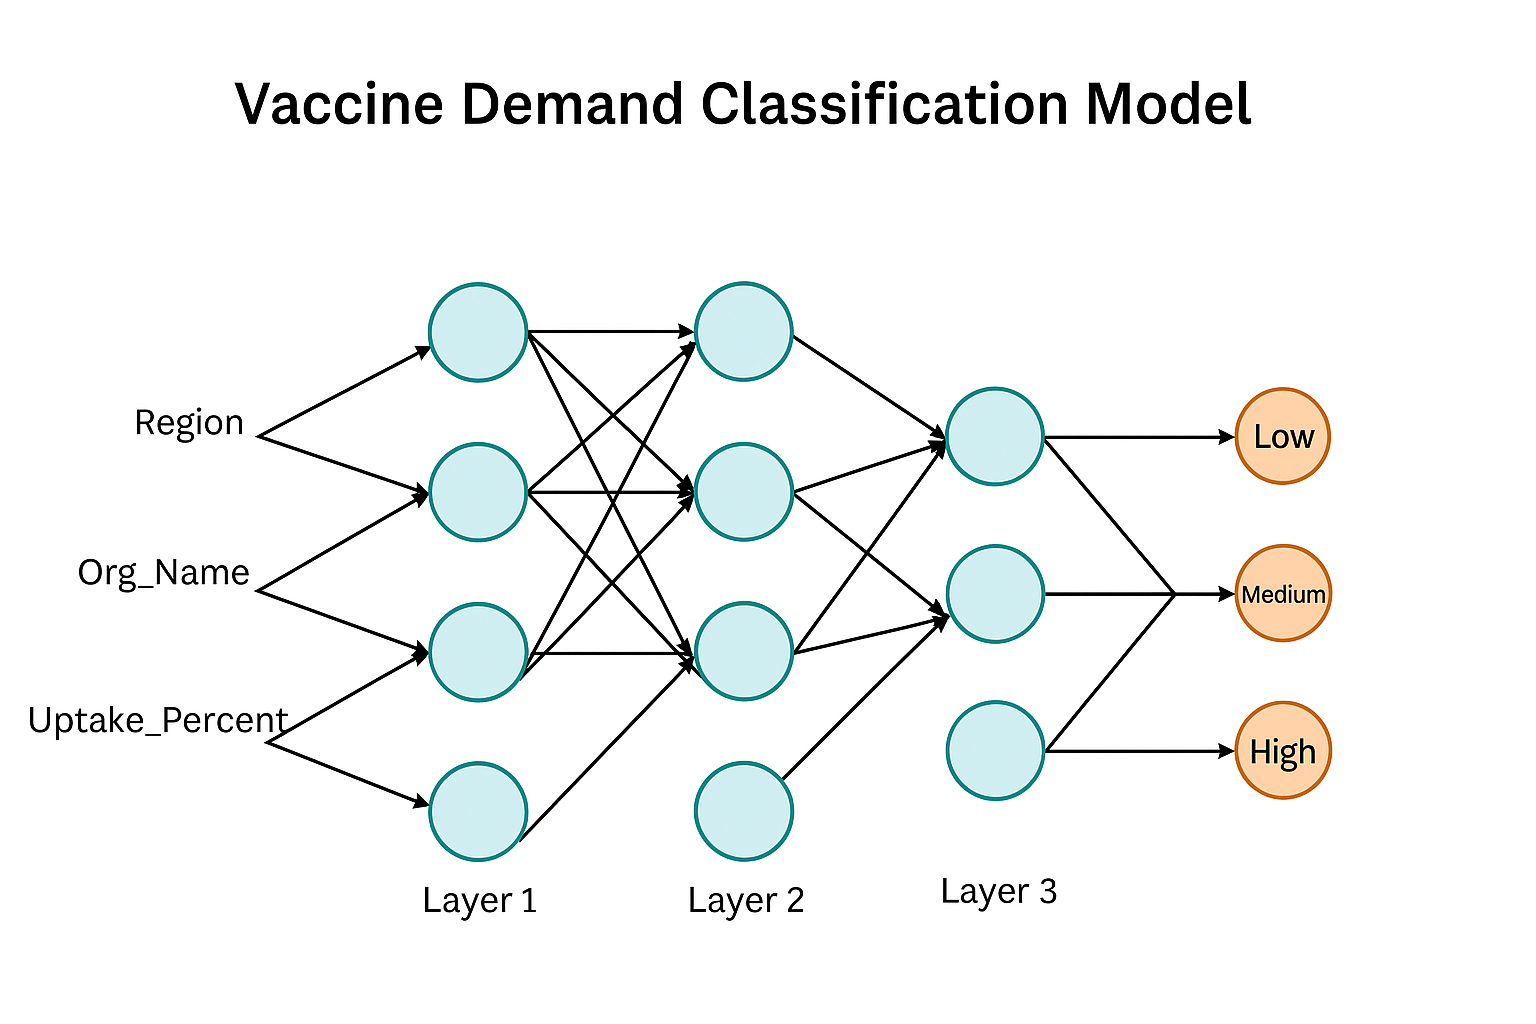

In [57]:
from IPython.display import Image, display

display(Image(filename='Vaccine demand classification model.png'))

# ML Algorithm: Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Create and train the logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

In [59]:
# Predict on Test set
y_pred_test = log_reg.predict(X_test)

# Print confusion matrix and classification report
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nClassification Report (Test):")
print(classification_report(
    y_test,
    y_pred_test,
    labels=[0, 1, 2],
    target_names=['Low', 'Medium', 'High'],
    zero_division=0  # avoid division errors if some classes are missing
))

Confusion Matrix (Test):
[[ 0  0  1]
 [ 0 21  0]
 [ 0  1 10]]

Classification Report (Test):
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



In [60]:
import os

if not os.path.exists("saved_models"):
    os.makedirs("saved_models")

In [61]:
# Save the logistic regression model
joblib.dump(log_reg, 'saved_models/model_logistic_regression.pkl')

['saved_models/model_logistic_regression.pkl']

# Task: Define a function that creates models without and With specified Optimization techniques

In [62]:
# Simple Neural Network model without Optimization Techniques
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
simple_model = Sequential()
simple_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
simple_model.add(Dense(16, activation='relu'))
simple_model.add(Dense(3, activation='softmax'))  # For 3 classes: Low, Medium, High

# Compile the model
simple_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (with default settings)
simple_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.1148 - loss: 1.2317 - val_accuracy: 0.2727 - val_loss: 1.1862
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2907 - loss: 1.1627 - val_accuracy: 0.4242 - val_loss: 1.1113
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3790 - loss: 1.0894 - val_accuracy: 0.5152 - val_loss: 1.0455
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4777 - loss: 1.0413 - val_accuracy: 0.5455 - val_loss: 0.9867
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6110 - loss: 0.9662 - val_accuracy: 0.6667 - val_loss: 0.9329
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6749 - loss: 0.9291 - val_accuracy: 0.7576 - val_loss: 0.8845
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7540 - loss: 0.8760 - val_accuracy: 0.7879 - val_loss: 0.8397
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7897 - loss: 0.8437 - val_accuracy: 0.8182 - val_loss: 0.7973
Epoch 9/30


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



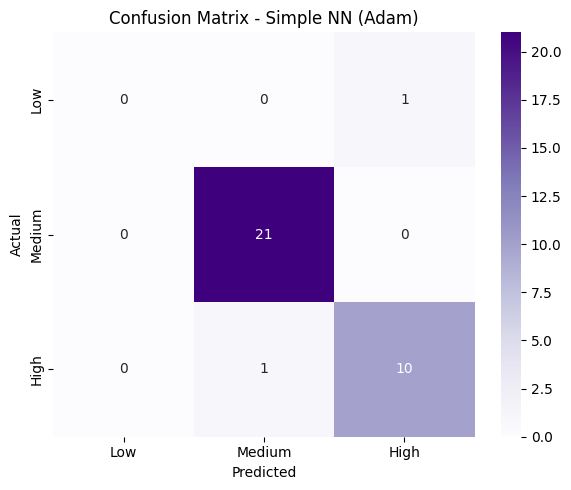

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities and class labels
y_pred_proba = simple_model.predict(X_test)
y_pred = y_pred_proba.argmax(axis=1)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'], zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Simple NN (Adam)")
plt.tight_layout()
plt.show()

In [64]:
simple_model.save('saved_models/model_nn_simple_baseline.h5')

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2, l1

def define_model(model_type):
    model = Sequential()

    if model_type == 'Adam':
        # Simpler structure with dropout
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        opt = Adam(learning_rate=0.005)

    elif model_type == 'RMSprop':
        # More complex structure with L2 regularization
        model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.1)))
        model.add(Dropout(0.7))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.7))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        opt = RMSprop(learning_rate=0.1)

    elif model_type == 'SGD':
        # Simpler model with L1 regularization and momentum
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.00005)))
        model.add(Dropout(0.5))
        model.add(Dense(3, activation='softmax'))
        opt = SGD(learning_rate=0.001, momentum=0.8)

    else:
        raise ValueError("Unknown model_type. Use 'Adam', 'RMSprop', or 'SGD'.")

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [66]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

# Class weights
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
cw_dict = dict(enumerate(class_weights))

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [67]:
import matplotlib.pyplot as plt

def loss_curve_plot(model):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=30, batch_size=32, verbose=1)

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model):
    # Predict class probabilities
    y_pred_proba = model.predict(X_test)

    # Convert probabilities to class labels
    y_pred = y_pred_proba.argmax(axis=1)

    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_proba = model.predict(X_test)  # probabilities, not argmax yet
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
    print("ROC AUC Score (macro-average):", round(roc_auc, 4))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'], zero_division=0))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6511 - loss: 0.9567 - val_accuracy: 0.8182 - val_loss: 0.6711
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8661 - loss: 0.6007 - val_accuracy: 0.9091 - val_loss: 0.4409
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9005 - loss: 0.4147 - val_accuracy: 0.9394 - val_loss: 0.2939
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9279 - loss: 0.3423 - val_accuracy: 0.9394 - val_loss: 0.2157
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9309 - loss: 0.2225 - val_accuracy: 0.9394 - val_loss: 0.1693
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9005 - loss: 0.2760 - val_accuracy: 0.9697 - val_loss: 0.1512
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9257 - loss: 0.2608 - val_accuracy: 0.9697 - val_loss: 0.1374
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9352 - loss: 0.2043 - val_accuracy: 0.9697 - val_loss: 0.1338
Epoch 9/30


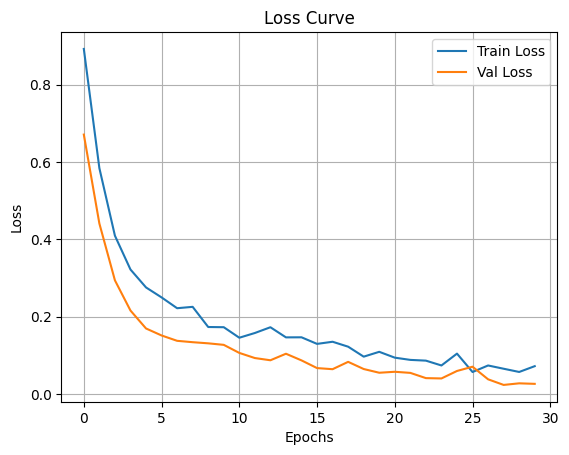

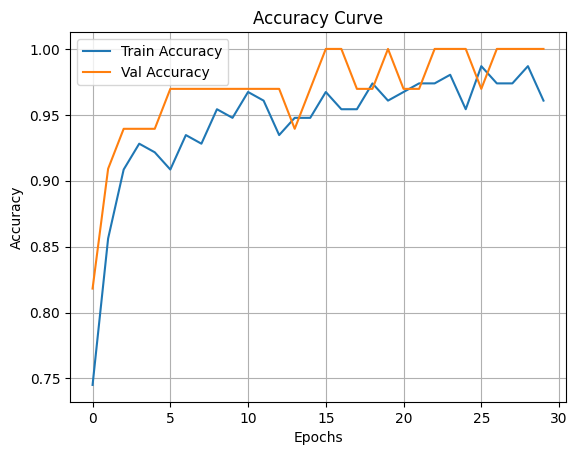

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
ROC AUC Score (macro-average): 0.9986


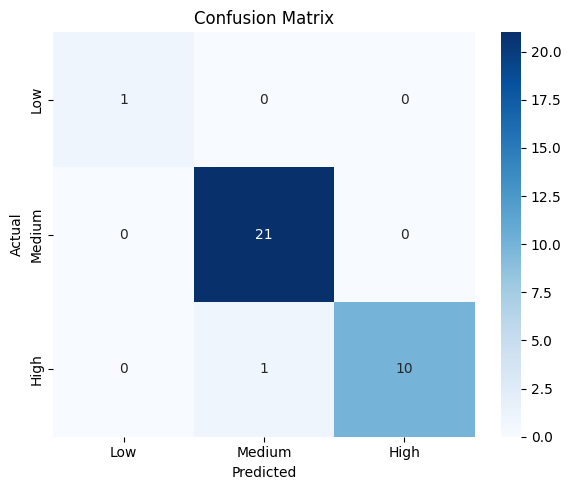

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         1
      Medium       0.95      1.00      0.98        21
        High       1.00      0.91      0.95        11

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.98        33
weighted avg       0.97      0.97      0.97        33



In [69]:
# Model 1: Adam
model_1 = define_model('Adam')
loss_curve_plot(model_1)
evaluate_model(model_1)
model_1.save('saved_models/model_nn_adam.h5')

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5371 - loss: 15.1085 - val_accuracy: 0.7273 - val_loss: 3.4350
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6419 - loss: 3.2140 - val_accuracy: 0.7273 - val_loss: 1.8697
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6649 - loss: 1.7880 - val_accuracy: 0.3030 - val_loss: 1.6127
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5954 - loss: 1.4958 - val_accuracy: 0.8485 - val_loss: 1.3343
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6254 - loss: 1.4518 - val_accuracy: 0.7273 - val_loss: 0.8313
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6032 - loss: 1.0914 - val_accuracy: 0.7273 - val_loss: 0.8146
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6397 - loss: 1.0208 - val_accuracy: 0.7273 - val_loss: 0.9850
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6454 - loss: 1.0980 - val_accuracy: 0.7273 - val_loss: 0.9116
Epoch 9/30

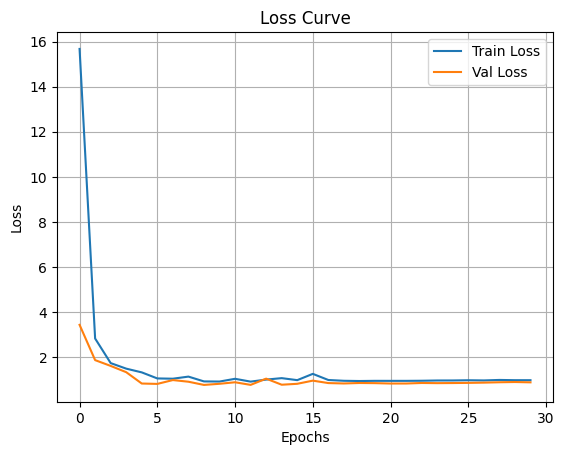

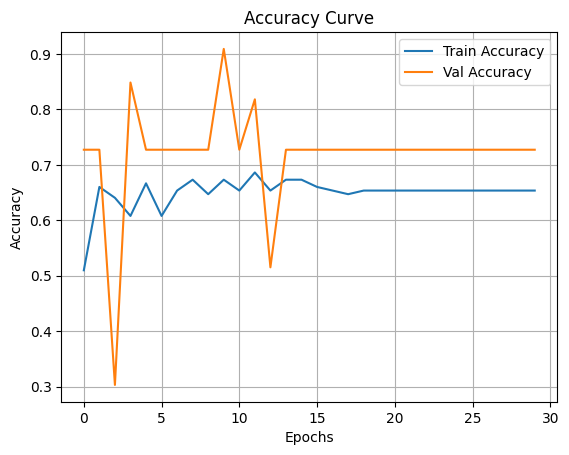

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
ROC AUC Score (macro-average): 0.5048


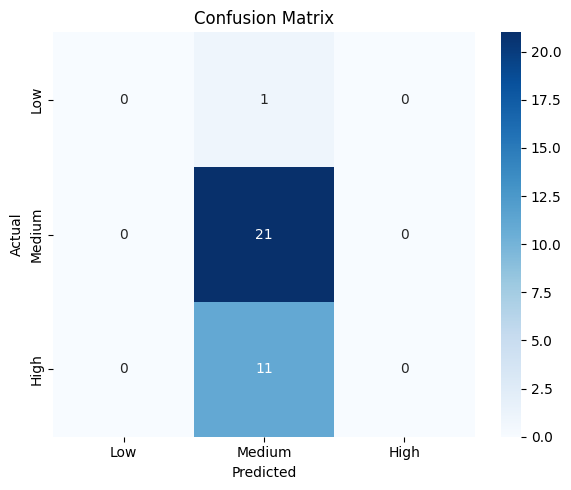

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.64      1.00      0.78        21
        High       0.00      0.00      0.00        11

    accuracy                           0.64        33
   macro avg       0.21      0.33      0.26        33
weighted avg       0.40      0.64      0.49        33



In [70]:
# Model 2: RMSprop
model_2 = define_model('RMSprop')
loss_curve_plot(model_2)
evaluate_model(model_2)
model_2.save('saved_models/model_nn_rmsprop.h5')

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5559 - loss: 0.9225 - val_accuracy: 0.6667 - val_loss: 0.8533
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5871 - loss: 0.9335 - val_accuracy: 0.6970 - val_loss: 0.8419
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6427 - loss: 0.9003 - val_accuracy: 0.6970 - val_loss: 0.8294
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6532 - loss: 0.8858 - val_accuracy: 0.7273 - val_loss: 0.8171
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6505 - loss: 0.8620 - val_accuracy: 0.7273 - val_loss: 0.8048
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6610 - loss: 0.8751 - val_accuracy: 0.7879 - val_loss: 0.7928
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6571 - loss: 0.9055 - val_accuracy: 0.7879 - val_loss: 0.7816
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7427 - loss: 0.8577 - val_accuracy: 0.7879 - val_loss: 0.7702
Epoch 9/30


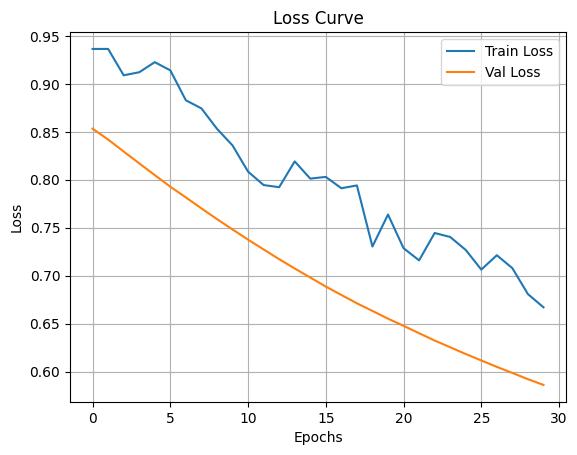

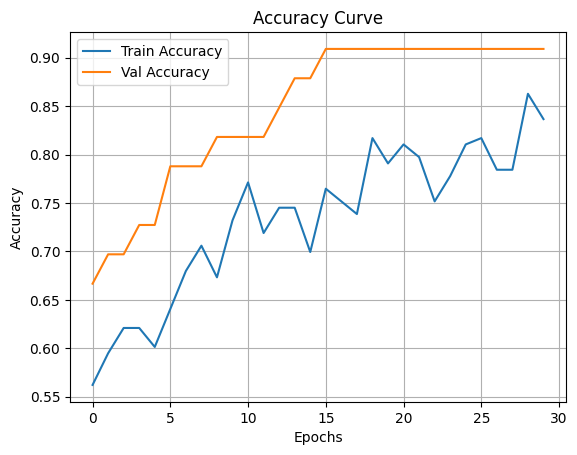

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
ROC AUC Score (macro-average): 0.6515


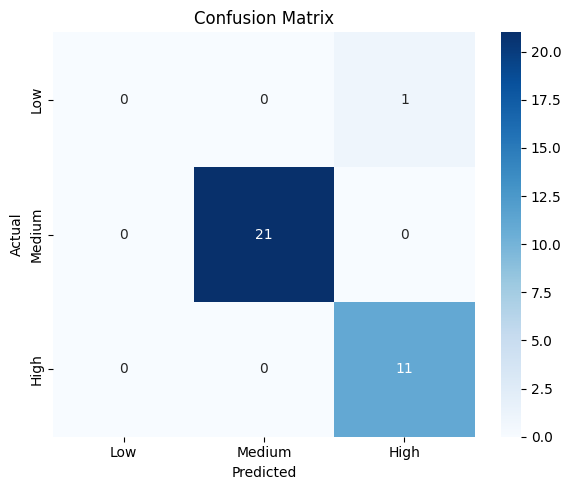

              precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       1.00      1.00      1.00        21
        High       0.92      1.00      0.96        11

    accuracy                           0.97        33
   macro avg       0.64      0.67      0.65        33
weighted avg       0.94      0.97      0.96        33



In [71]:
# Model 3: SGD
model_3 = define_model('SGD')
loss_curve_plot(model_3)
evaluate_model(model_3)
model_3.save('saved_models/model_nn_sgd.h5')

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later




In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved_models/best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

model = define_model('Adam')
model.fit(X_train, y_train,
          epochs=30,
          validation_data=(X_val, y_val),
          callbacks=[checkpoint])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 3s 799ms/step - accuracy: 0.2188 - loss: 1.1862

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3765 - loss: 1.0871 - val_accuracy: 0.8182 - val_loss: 0.7622
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7818 - loss: 0.7417 - val_accuracy: 0.8182 - val_loss: 0.5080
Epoch 3/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8438 - loss: 0.5291

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8327 - loss: 0.5114 - val_accuracy: 0.9697 - val_loss: 0.3466
Epoch 4/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9375 - loss: 0.4098

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8865 - loss: 0.3867 - val_accuracy: 1.0000 - val_loss: 0.2473
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9244 - loss: 0.2694 - val_accuracy: 0.9394 - val_loss: 0.2106
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9352 - loss: 0.2102 - val_accuracy: 0.9697 - val_loss: 0.1796
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9235 - loss: 0.2188 - val_accuracy: 0.9697 - val_loss: 0.1377
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9396 - loss: 0.1956 - val_accuracy: 1.0000 - val_loss: 0.1139
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9096 - loss: 0.2333 - val_accuracy: 1.0000 - val_loss: 0.1130
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9622 - loss: 0.1638 - val_accuracy: 1.0000 - val_loss: 0.1020
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9405 - loss: 0.1710 - val_accuracy: 0.9697 - val_loss: 0.1125
Epoch 12/

In [73]:
model.save('saved_models/best_model.h5')

In [74]:
from tensorflow.keras.models import load_model
import numpy as np

def make_prediction(model_path, X):
    # Load the saved model
    model = load_model(model_path)

    # Make predictions (probabilities for each class)
    probas = model.predict(X)

    # Convert probabilities to class labels (0, 1, or 2)
    predictions = np.argmax(probas, axis=1)

    return predictions

In [75]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


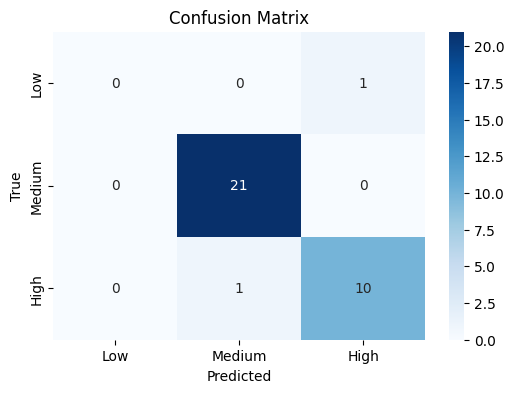

F1 Score: 0.9245947850599012

Classification Report:
               precision    recall  f1-score   support

         Low       0.00      0.00      0.00         1
      Medium       0.95      1.00      0.98        21
        High       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.62      0.64      0.63        33
weighted avg       0.91      0.94      0.92        33



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [76]:
# Load predictions
model_path = "saved_models/best_model.h5"
y_pred = make_predictions(model_path, X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# F1 Score and Report
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

Congratulations!!
